## Explanation of the project

In this project, we try to improve the advertising for every customer who comes to the mall, for which we divided the consumers into 3 groups: ***0,1,2***.
- ***Group 0*** - This is a group of consumers who do not buy much in the first place, so we will not invest in advertising for it.
- ***Group 1*** - This is a group that buys in the mall at an average ratio to other customers, so for example, for them we will publish a club card, so we will make them buy from us in the mall more than than elsewhere and so we will make them more loyal customers.
- ***Group 2*** - This is the group of customers who are loyal to the mall in the first place and buy a lot. Therefore for this group we can, for example, advertise 1 + 1 promotions for them. Since they are loyal customers anyway with the help of this sale we can make them buy even more at the mall (they were looking to buy a certain product but saw that there is a 1 + 1 sale on another product and will buy it as well).

#### The division into groups is as follows
The mall gave a score to each consumer for how much he buys in the mall (Column -  Spending Score (1-100)).
Therefore, with the help of this column, we divided the consumers into three groups:
- ***0*** - This is the group that got the score 0-33.
- ***1*** - This is the group that received a score of 33-66.
- ***2*** - This is the group that received the score 66-100

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

In [5]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Explanation of the features
- **CustomerID** - Unique ID assigned to the customer
- **Gender** - Male / Female
- **Age** - The age of the customer
- **Annual Income (k$)** - How much money does the consumer make per year
- **Spending Score (1-100)** - Score assigned by the mall based on customer behavior and spending nature

## There are no null values in the data

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## I want to divide the customers into 3 number groups: 0,1,2. This is the amount of people in each group

In [7]:
zero = ((df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 33)).sum()
one = ((df['Spending Score (1-100)'] > 33) & (df['Spending Score (1-100)'] <= 66)).sum()
two = ((df['Spending Score (1-100)'] > 66) & (df['Spending Score (1-100)'] <= 100)).sum()
print(f'There are {zero} from the group that we divided it into 0')
print(f'There are {one} from the group that we divided it into 1')
print(f'There are {two} from the group that we divided it into 2')
lst_group = [zero,one,two]

There are 49 from the group that we divided it into 0
There are 94 from the group that we divided it into 1
There are 57 from the group that we divided it into 2


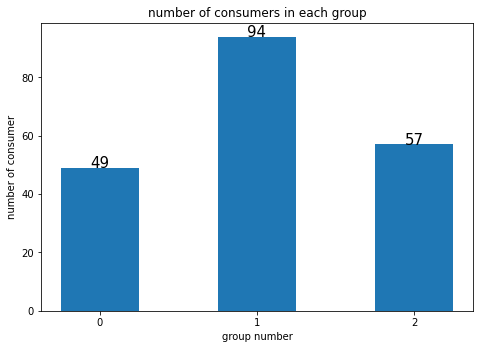

In [8]:
fig = plt.figure()

# [left, bottom, width, height]
axes = fig.add_axes([1,1,1,1])
axes.set_title("number of consumers in each group")
axes.set_ylabel("number of consumer")
axes.set_xlabel("group number")
group_number = ['0','1','2']
number_of_consumers_in_the_group = [zero,one,two]
axes.bar(group_number,number_of_consumers_in_the_group,  width=0.5)
for index, value in enumerate(lst_group):
    plt.text(index,value, str(value),fontsize=15,horizontalalignment='center')
plt.show()

## Now I made 3 new dataframe for each group and at the end I connected back between them all in order to make a new column for each group separately

In [9]:
# group zero
zero = ((df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 33))
df_only_zero = pd.DataFrame(df[zero])
df_only_zero['Consumer type'] = 0
df_only_zero.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
2,3,Female,20,16,6,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0


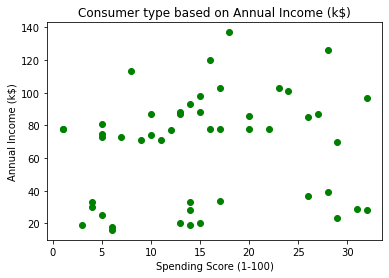

In [10]:
# group zero scatter plot
plt.title("Consumer type based on Annual Income (k$)")
x = df_only_zero["Spending Score (1-100)"]
y = df_only_zero["Annual Income (k$)"]
plt.scatter(x,y , color = 'green')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [11]:
# group one
one = ((df['Spending Score (1-100)'] > 33) & (df['Spending Score (1-100)'] <= 66))
df_only_one = pd.DataFrame(df[one])
df_only_one['Consumer type'] = 1
df_only_one.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
0,1,Male,19,15,39,1
4,5,Female,31,17,40,1
16,17,Female,35,21,35,1
17,18,Male,20,21,66,1
20,21,Male,35,24,35,1


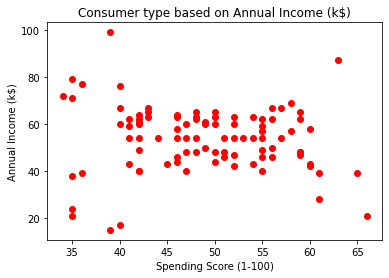

In [12]:
# group one scatter plot
plt.title("Consumer type based on Annual Income (k$)")
x1 = df_only_one["Spending Score (1-100)"]
y1 = df_only_one["Annual Income (k$)"]
plt.scatter(x1,y1 ,color='red')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [13]:
# group two
two = ((df['Spending Score (1-100)'] > 66) & (df['Spending Score (1-100)'] <= 100))
df_only_two = pd.DataFrame(df[two])
df_only_two['Consumer type'] = 2
df_only_two.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2


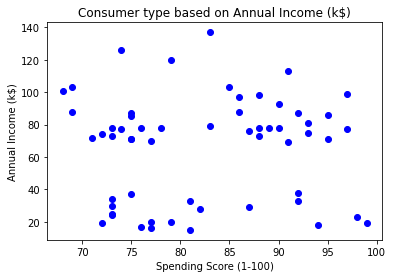

In [14]:
# group two scatter plot
plt.title("Consumer type based on Annual Income (k$)")
x2 = df_only_two["Spending Score (1-100)"]
y2 = df_only_two["Annual Income (k$)"]
plt.scatter(x2,y2 ,color='blue')
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

In [15]:
#new data frame
pdList = [df_only_zero, df_only_one, df_only_two]
new_df = pd.concat(pdList)
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
2,3,Female,20,16,6,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
...,...,...,...,...,...,...
191,192,Female,32,103,69,2
193,194,Female,38,113,91,2
195,196,Female,35,120,79,2
197,198,Male,32,126,74,2


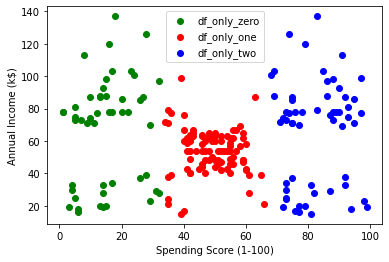

In [16]:
# scatter plot of all three groups together (zero, one ,two)
plt.scatter(x,y, color='green')
plt.scatter(x1,y1, color='red')
plt.scatter(x2,y2, color='blue')
plt.legend(['df_only_zero','df_only_one','df_only_two'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

## this is the new data frame with the consumer type column

In [17]:
#here i sort them by the CustomerID
new_df = new_df.sort_values(by=['CustomerID'])
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## Here I changed the values of a male / female to a number
- **female** - 0
- **male** - 1

In [18]:
le = preprocessing.LabelEncoder()
new_df['Gender'] = le.fit_transform(list(new_df['Gender']))
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Consumer type
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


### The KNN model searched for the optimal K and found it to be 4

In [19]:
k_range = list(range(1, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

NameError: name 'x_train' is not defined

In [ ]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [20]:
predict = 'Consumer type' # we want to predict the Consumer type
# In x are all the features with which we want to check the type of consumer and therefore we will subtract from x the
# ['Consumer type', 'Spending Score (1-100)','CustomerID']
# CustomerID - Because it's irrelevant
# 'Consumer type', 'Spending Score (1-100)' - These are basically what we want to find out and if we were to
# leave the 'Spending Score (1-100)' It would be like leaving the 'Consumer type'
x = np.array(new_df.drop(columns = ['Consumer type', 'Spending Score (1-100)','CustomerID']))

# In y is what you want to find out - 'Consumer type',
y = np.array(new_df['Consumer type'])

# Split for train and test ,random_state is used so the train & test will not change
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

# print(x_train)

# This is the KNN model that is put into learning x_train , y_train 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

# This is the prediction, we want it to predict for x_test
# And finally print the percentage of accuracy of the model.
#Enter 2 arguments:
# 1 - the y_test (because that's basically what we know to be true).
# 2 - the y_pred. 
# We want to test some of what is really true (y_test) the model was able to predict in y_pred
y_pred = knn.predict(x_test)
print(f' the accuracy of the model is: {metrics.accuracy_score(y_test, y_pred)} ')
print(y_test[:30])
print(y_pred[:30])

 the accuracy of the model is: 0.82 
[0 0 1 1 2 0 2 1 0 0 1 2 0 0 1 2 2 0 2 1 2 2 1 2 1 2 2 2 1 0]
[0 0 1 1 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 1 2 2 1 2 1 1 2 2 1 1]


- According to the cross validation, it is actually 0.68

In [21]:
scores = cross_val_score(knn, x, y, cv=4, scoring='accuracy')
print(scores)
print(scores.mean())

[0.62 0.68 0.8  0.62]
0.68


- It's just to see that the division into train & test is done properly (if you don't tell the model by what percentage to divide, the default is 25%)

In [22]:
print(x_train.shape)
print(x_test.shape)

(150, 3)
(50, 3)


In [23]:
print(y_train.shape)
print(y_test.shape)

(150,)
(50,)


## This is the Logistic Regression model

- Here the model showed the same accuracy between the accuracy of the model versus the cross validation

In [24]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print(f' the accuracy of the model is: {metrics.accuracy_score(y_test, y_pred_log)} ')
print(y_test[:30])
print(y_pred_log[:30])

# Logistic Regression cross-validation divided into 4 like the knn
cv = cross_val_score(logreg, x, y, cv=4, scoring='accuracy').mean()
print(f'The cross-validation in logistic regression is: {cv}')

 the accuracy of the model is: 0.52 
[0 0 1 1 2 0 2 1 0 0 1 2 0 0 1 2 2 0 2 1 2 2 1 2 1 2 2 2 1 0]
[1 0 1 1 2 0 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 2 1 1 0 2 1 1]
The cross-validation in logistic regression is: 0.52


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## confusion_matrix with an explanation below
- It is a 3 component confusion_matrix
- Put in confusion matrix: y_test, y_pred
- and for the plot: knn.fit(x_train, y_train), x_test, y_test)
- I didn't do a roc curve because it is only for classification with only 2 options and in this project i have 3.

In [25]:
print(metrics.confusion_matrix(y_test, y_pred))  
plot = metrics.confusion_matrix(y_test, y_pred)

[[12  2  1]
 [ 3 17  0]
 [ 1  2 12]]


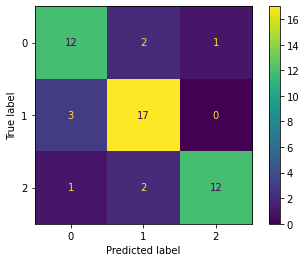

There are 50 estimates


In [26]:
plot_confusion_matrix(knn.fit(x_train, y_train), x_test, y_test)  
plt.show() 
print(f'There are {y_pred.shape[0]} estimates')

- This shows us the accuracy for which the model predicted for each group individually and also general accuracy for the model
- The recall is what the percentage of the total everything that is really true also came out right in the model

In [27]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.81      0.85      0.83        20
           2       0.92      0.80      0.86        15

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



### Explanation about the confusion matrix

First of all, let's mention that we divided the consumers into 3 groups: 0,1,2.

Each number in the matrix represents the number of times the model predicted the particular component according to its true value and therefore the total number is 50 and this is the same as the number of components that were in the test, also 50.

***confusion matrix shows us the data in 4 ways:***
- TP - (true positive)
- TN - (true negative)
- FP - (false positive)
- FN - (false negative)

This x-axis symbolizes what the model predicted and the y-axis symbolizes the true value.

For the explanation let us take for example the square in the upper left corner.
This square is found in a point where both the true value is 0 and the value that the model predicted is 0, this point is called ***TP (true positive)*** because the model predicted the original value, and so it is for each component (0,1,2) diagonally from the top left down.
The two on the right are - ***FN (false negative)***, the two below it are - ***FP (false positive)***, and the rest are -***TN (true negative)***.